# Analysis of the Returns of Bitcoin

## Setup

In [1]:
from matplotlib import font_manager
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Set charts theme
sns.set_theme(style="darkgrid", rc={"grid.alpha": 0.33})
plt.style.use("dark_background")

# Save chart as png function
def save_chart_as_png(filename: str) -> None:
    plt.savefig(
        f"../images/{filename}.png",
        format="png",
        dpi=300,
        orientation="landscape",
        bbox_inches="tight",
    )

In [3]:
# Get all dfs
def get_df(csv_basename: str) -> pd.DataFrame:
    # Get df from CSV with date as index
    return pd.read_csv(f"../data/{csv_basename}.csv", index_col="date", parse_dates=True)

df_btc = get_df("BTC")
df_sp500 = get_df("SP500")
df_us10y = get_df("US10Y")
df_au = get_df("AU")
df_wti = get_df("WTI")
df_chf = get_df("CHF")

## Bitcoin Returns Over Time 💰

In [4]:
# Get daily price change and moving averages
df_btc["price_change"] = df_btc["price"].pct_change()
df_btc["price_change_log"] = np.log(df_btc["price"] / df_btc["price"].shift(1))
df_btc["price_change_log_90d_ma"] = df_btc["price_change_log"].rolling(window=90).mean()
df_btc["price_change_log_1y_ma"] = df_btc["price_change_log"].rolling(window=365).mean()

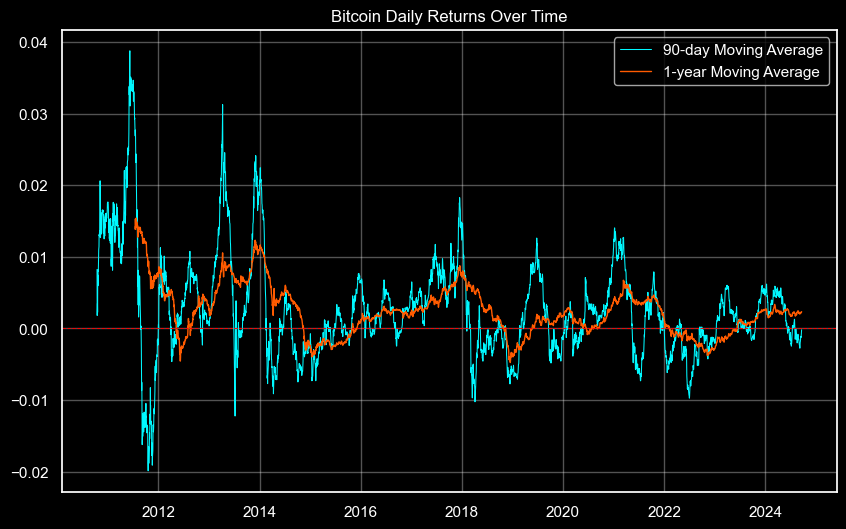

In [5]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_btc, x=df_btc.index, y="price_change_log_90d_ma", label="90-day Moving Average", color="#00f8ff", linewidth=0.75)
sns.lineplot(data=df_btc, x=df_btc.index, y="price_change_log_1y_ma", label="1-year Moving Average", color="#ff5b00", linewidth=1)

plt.axhline(y=0, color="red", linewidth=2/3, linestyle="--")

plt.title("Bitcoin Daily Returns Over Time")
plt.xlabel(None)
plt.ylabel(None)

save_chart_as_png("2_BTC_returns")

In [6]:
# Highest daily return
df_btc.loc[[df_btc["price_change"].idxmax()]]

,price,price_change,price_change_log,price_change_log_90d_ma,price_change_log_1y_ma
date,,,,,
2010-07-18,0.0858,0.716,0.539996,NaN,NaN


In [7]:
# Lowest daily return
df_btc.loc[[df_btc["price_change"].idxmin()]]

,price,price_change,price_change_log,price_change_log_90d_ma,price_change_log_1y_ma
date,,,,,
2011-06-11,14.6511,-0.388255,-0.49144,0.031092,NaN


In [8]:
# Total cumulative returns (which is the exact same as price appreciation since first entry)
(df_btc["price_change"] + 1).prod() - 1

1262458.55

In [9]:
# Compound annual growth rate (CAGR)
start_value = df_btc["price"].iloc[0]
end_value = df_btc["price"].iloc[-1]
n = (df_btc.index[-1] - df_btc.index[0]).days / 365.25

(end_value / start_value) ** (1 / n) - 1

1.6933300072424045

**Key takeaways:**
- In the early years, up until 2014, bitcoin experienced significant price fluctuations.
- As the asset matured, particularly after 2019, price movements stabilized, indicating a clear trend toward less extreme volatility.
- The highest daily return occurred in July 2010, reaching approximately 72%, while the lowest return was around -39% in June 2011.
- The compound annual growth rate (CAGR) has been roughly 170% to date.

### Comparison of Returns With Other Assets

In [10]:
# Resample all dfs to weekly frequency, to be able to compare with bitcoin's 365 trading days, and also make sure other dfs start at the same point of btc df.
df_btc_w = df_btc[["price"]].resample("W").mean()
df_sp500_w = df_sp500.loc[df_sp500.index >= df_btc.index.min()].resample("W").mean()
df_us10y_w = df_us10y.loc[df_us10y.index >= df_btc.index.min()].resample("W").mean()
df_au_w = df_au.loc[df_au.index >= df_btc.index.min()].resample("W").mean()
df_wti_w = df_wti.loc[df_wti.index >= df_btc.index.min()].resample("W").mean()
df_chf_w = df_chf.loc[df_chf.index >= df_btc.index.min()].resample("W").mean()

In [11]:
# Get 1-year moving average of returns for each weekly df
for df in [df_btc_w, df_sp500_w, df_us10y_w, df_wti_w, df_au_w, df_chf_w]:
    # Get arithmetic returns using the first column, instead of log returns since the oil data includes non-positive prices
    df["returns"] = df.iloc[:, 0].pct_change()
    # Get 1-year moving average of weekly returns
    df["returns_1y_ma"] = df["returns"].rolling(window=52).mean()

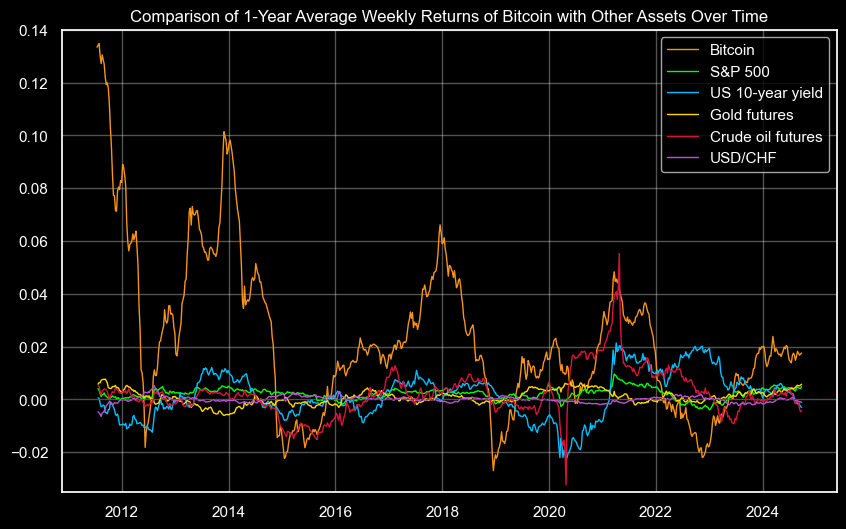

In [12]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_btc_w, x=df_btc_w.index, y="returns_1y_ma", label="Bitcoin", color="#f7931a", linewidth=1)
sns.lineplot(data=df_sp500_w, x=df_sp500_w.index, y="returns_1y_ma", label="S&P 500", color="lime", linewidth=1)
sns.lineplot(data=df_us10y_w, x=df_us10y_w.index, y="returns_1y_ma", label="US 10-year yield", color="deepskyblue", linewidth=1)
sns.lineplot(data=df_au_w, x=df_au_w.index, y="returns_1y_ma", label="Gold futures", color="gold", linewidth=1)
sns.lineplot(data=df_wti_w, x=df_wti_w.index, y="returns_1y_ma", label="Crude oil futures", color="crimson", linewidth=1)
sns.lineplot(data=df_chf_w, x=df_chf_w.index, y="returns_1y_ma", label="USD/CHF", color="mediumorchid", linewidth=1)

plt.axhline(y=0, color="red", linewidth=2/3, linestyle="--")

plt.ylim([-0.035, 0.14])

plt.title("Comparison of 1-Year Average Weekly Returns of Bitcoin with Other Assets Over Time")
plt.xlabel(None)
plt.ylabel(None)

save_chart_as_png("2_BTC_returns_comparison")

In [13]:
# Create table with average weekly returns of each asset for different timeframes
def get_timeframes_avg_returns(df: pd.DataFrame) -> dict[str, float]:
    return {
        "Total avg weekly returns": round(df["returns"].mean(), 4),
        "2011-2016 avg": round(df[df.index.year < 2016]["returns"].mean(), 4),
        "2016-2020 avg": round(df[(df.index.year >= 2016) & (df.index.year < 2020)]["returns"].mean(), 4),
        "2020-2024 avg": round(df[df.index.year >= 2020]["returns"].mean(), 4),
    }

df_avg_returns = pd.DataFrame({
    "Bitcoin": get_timeframes_avg_returns(df_btc_w),
    "S&P 500": get_timeframes_avg_returns(df_sp500_w),
    "US 10-year yield": get_timeframes_avg_returns(df_us10y_w),
    "Gold futures": get_timeframes_avg_returns(df_au_w),
    "Crude oil futures": get_timeframes_avg_returns(df_wti_w),
    "USD/CHF": get_timeframes_avg_returns(df_chf_w),
}).T

df_avg_returns.sort_values(by=df_avg_returns.columns[0], ascending=False)

,Total avg weekly returns,2011-2016 avg,2016-2020 avg,2020-2024 avg
Bitcoin,0.0251,0.0428,0.0173,0.0115
S&P 500,0.0024,0.0024,0.0023,0.0025
Crude oil futures,0.0021,-0.0021,0.0032,0.0061
US 10-year yield,0.0014,-0.0002,-0.0001,0.0045
Gold futures,0.0012,-0.0002,0.0017,0.0024
USD/CHF,-0.0002,-0.0001,-0.0000,-0.0006


**Key takeaways:**
- Bitcoin has outperformed other major assets, with significantly higher average returns, despite experiencing the lowest single-period returns.
- The disparity in returns was particularly striking before 2019, with the cryptocurrency leading by a wide margin.
- On the downside, bitcoin also experienced the steepest negative returns, sometimes close to crude oil and US 10-year bonds.
- So far, bitcoin’s average weekly returns have been more than 10 times greater than those of the S&P 500.

### Distribution of Returns

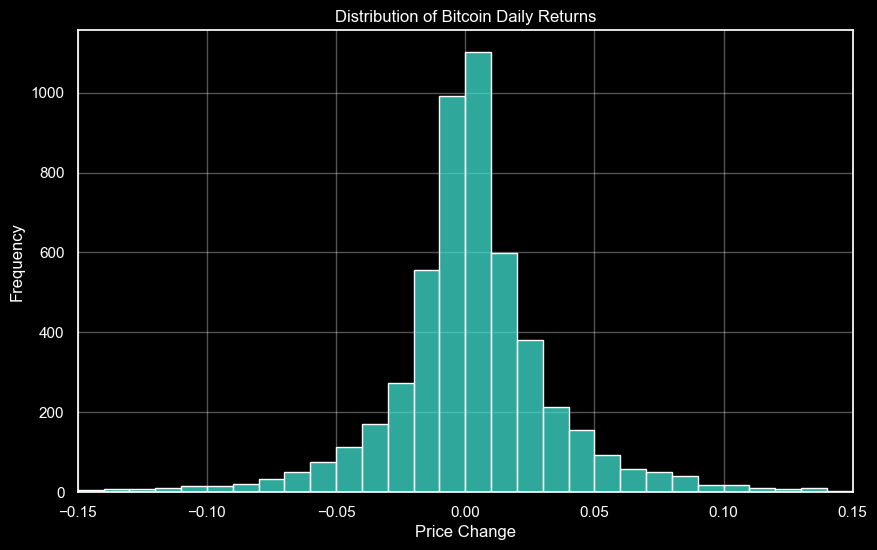

In [14]:
sym_limit = 0.15
df_btc_lim = df_btc.query(f"{-sym_limit} <= price_change_log <= {sym_limit}")

plt.figure(figsize=(10, 6))

sns.histplot(df_btc_lim["price_change_log"], binwidth=0.01, binrange=(-sym_limit, sym_limit), color="turquoise", edgecolor="white", alpha=3/4)

plt.xlim(-sym_limit, sym_limit)

plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Price Change")
plt.ylabel("Frequency")

save_chart_as_png("2_BTC_returns_dist")

In [15]:
# Create table with daily returns stats
pd.DataFrame({
    "Average return": [round(df_btc["price_change_log"].mean(), 4)],
    "Median return": [round(df_btc["price_change_log"].median(), 4)],
    "Standard deviation": [round(df_btc["price_change_log"].std(), 4)],
    "Min return": [round(df_btc["price_change_log"].min(), 4)],
    "Max return": [round(df_btc["price_change_log"].max(), 4)],
    "Skewness": [round(df_btc["price_change_log"].skew(), 4)],
    "Kurtosis": [round(df_btc["price_change_log"].kurt(), 4)],
})

,Average return,Median return,Standard deviation,Min return,Max return,Skewness,Kurtosis
0,0.0027,0.0014,0.0433,-0.4914,0.54,0.0093,24.9568


**Key takeaways:**
- The average return suggests long-term appreciation, while the lower median return indicates the presence of some positive outliers.
- A high standard deviation highlights the significant volatility in bitcoin's returns.
- This asset experiences rare but extreme returns, both positive and negative.
- The skewness, being close to zero, suggests that the distribution of returns is nearly balanced between gains and losses.
- However, the extremely high kurtosis indicates that extreme returns, far beyond what would be expected in a normal distribution, are more frequent.

### Distribution of Yearly Rolling Returns

In [16]:
# Get yearly rolling returns
btc_yearly_rolling_returns = df_btc["price_change_log"].rolling(window=365).sum().dropna()

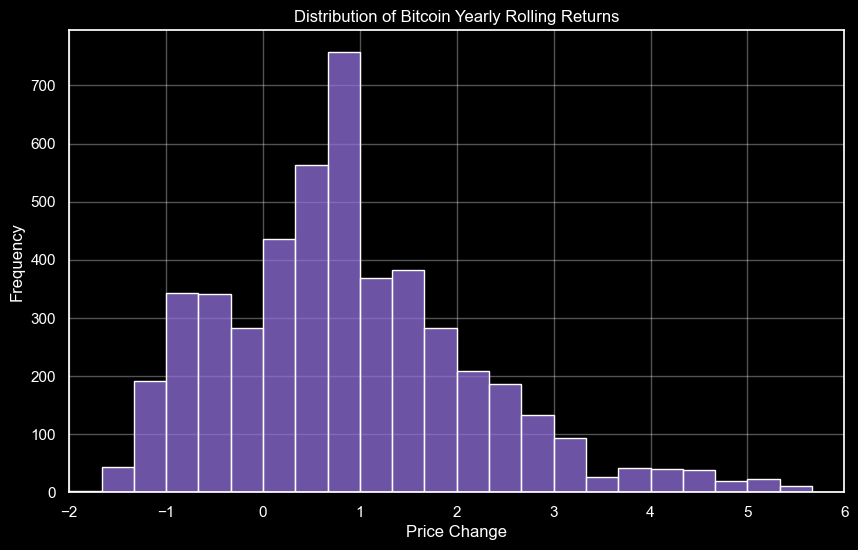

In [17]:
plt.figure(figsize=(10, 6))

sns.histplot(btc_yearly_rolling_returns, binwidth=1/3, binrange=(-2, 6), color="mediumpurple", edgecolor="white", alpha=3/4)

plt.xlim(-2, 6)

plt.title("Distribution of Bitcoin Yearly Rolling Returns")
plt.xlabel("Price Change")
plt.ylabel("Frequency")

save_chart_as_png("2_BTC_returns_y_rol_dist")

In [18]:
# Create table with yearly rolling returns stats
pd.DataFrame({
    "Average return": [round(btc_yearly_rolling_returns.mean(), 4)],
    "Median return": [round(btc_yearly_rolling_returns.median(), 4)],
    "Standard deviation": [round(btc_yearly_rolling_returns.std(), 4)],
    "Min return": [round(btc_yearly_rolling_returns.min(), 4)],
    "Max return": [round(btc_yearly_rolling_returns.max(), 4)],
    "Skewness": [round(btc_yearly_rolling_returns.skew(), 4)],
    "Kurtosis": [round(btc_yearly_rolling_returns.kurt(), 4)],
})

,Average return,Median return,Standard deviation,Min return,Max return,Skewness,Kurtosis
0,0.8669,0.7962,1.2837,-1.7385,5.6282,0.7123,0.6934


**Key takeaways:**
- Shifting from daily to rolling yearly returns leads to a noticeable transformation in the distribution.
- The average return now aligns more closely with the median, indicating that yearly returns have less outliers compared to daily returns.
- A higher standard deviation reflects greater dispersion in yearly returns, highlighting larger fluctuations over time.
- Minimum and maximum returns become more extreme over longer periods, which is expected (note that log returns can fall below -1).
- An increase in positive skew suggests that large positive returns are more common in yearly returns compared to daily ones.
- While still positive, the significantly lower kurtosis shows a reduction in extreme outliers when compared to the daily return distribution.

## Bitcoin Year-over-Year Returns Over Time 📊

In [19]:
# Get YoY returns
# Get yearly bitcoin price df with first and last prices
df_btc_yearly = df_btc.groupby(df_btc.index.year)["price"].agg(
    first_price="first",
    last_price="last",
)
# Get YoY return
df_btc_yearly["price_change"] = (df_btc_yearly["last_price"] - df_btc_yearly["first_price"]) / df_btc_yearly["first_price"]

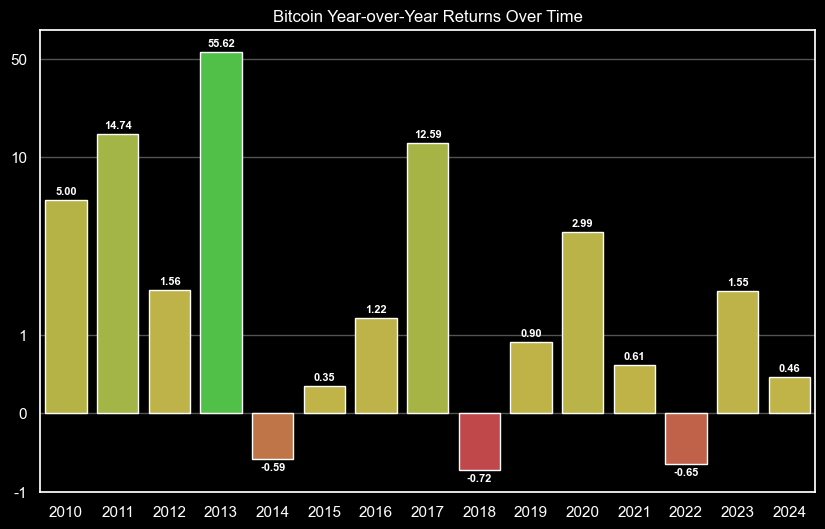

In [20]:
plt.figure(figsize=(10, 6))

# Create a custom palette for positive and negative returns
palette_greens = LinearSegmentedColormap.from_list("positive",["#d4c334", "#40d434"])
palette_reds = LinearSegmentedColormap.from_list("negative", ["#d43438", "#d47034"])

# Get one barplot for the positive and another for the negative returns while making sure they are in the correct order
ax = sns.barplot(data=df_btc_yearly[df_btc_yearly["price_change"] >= 0], x="date", y="price_change", order=df_btc_yearly.index, palette=palette_greens, hue="price_change", legend=False)
ax = sns.barplot(data=df_btc_yearly[df_btc_yearly["price_change"] < 0], x="date", y="price_change", order=df_btc_yearly.index, palette=palette_reds, hue="price_change", legend=False)

plt.yscale("symlog")
plt.ylim(-1, 80)

plt.yticks([-1, 0, 1, 10, 50])

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))

# Label each bar with its value
font_properties = font_manager.FontProperties(family="sans-serif", weight="bold", size=8)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=2.5, fontproperties=font_properties)

plt.title("Bitcoin Year-over-Year Returns Over Time")
plt.xlabel(None)
plt.ylabel(None)

save_chart_as_png("2_BTC_YoY_returns")

In [21]:
# Highest YoY return
df_btc_yearly.loc[[df_btc_yearly["price_change"].idxmax()]]

,first_price,last_price,price_change
date,,,
2013,13.3041,753.27,55.619388


In [22]:
# Lowest YoY return
df_btc_yearly.loc[[df_btc_yearly["price_change"].idxmin()]]

,first_price,last_price,price_change
date,,,
2018,13781.491999,3800.625846,-0.724222


In [23]:
# Create table with YoY returns stats
pd.DataFrame({
    "Average YoY return": [round(df_btc_yearly["price_change"].mean(), 4)],
    "Median YoY return": [round(df_btc_yearly["price_change"].median(), 4)],
    "Standard deviation": [round(df_btc_yearly["price_change"].std(), 4)],
    "Min YoY return": [round(df_btc_yearly["price_change"].min(), 4)],
    "Max YoY return": [round(df_btc_yearly["price_change"].max(), 4)],
    "Cumulative product YoY return": [(1 + df_btc_yearly["price_change"]).cumprod().iloc[-1].round(4) - 1],
})

,Average YoY return,Median YoY return,Standard deviation,Min YoY return,Max YoY return,Cumulative product YoY return
0,6.3762,1.2193,14.3989,-0.7242,55.6194,1.021584e+06


**Key takeaways:**
- Over the past 15 years (assuming 2024 will be positive), only 3 years have ended with negative returns.
- Despite a dramatic 93% drop in the second half of 2011, that year still ranks as bitcoin's second best, reflecting the extreme volatility in its early days.
- 2013 was bitcoin's "golden year", with an extraordinary 5,562% rise. It's highly unlikely that this record will ever be surpassed.
- In 2018, the cryptocurrency faced its biggest downturn, losing around 72% of its value.
- Since 2013, bitcoin's standout years have shown diminishing returns, confirming a slowdown in the momentum seen earlier, as the market moves toward more stable price patterns.
- This could be attributed to bitcoin's higher market capitalization and increased liquidity, making it harder for single events or trades to trigger large price movements.
- Another factor may be the rise of ethereum, launched in mid-2015. Its growing popularity, alongside the emergence of other altcoins, has likely diverted attention and capital from bitcoin.

## Returns Before vs. Since 2014 🍕

In [24]:
# Get data before and since 2014 into separate dfs
df_btc_b2014 = df_btc[df_btc.index.year < 2014].copy()
df_btc_s2014 = df_btc[df_btc.index.year >= 2014].copy()

In [25]:
# Add day number as a column to each df
df_btc_b2014["day_number"] = range(1, len(df_btc_b2014) + 1)
df_btc_s2014["day_number"] = range(1, len(df_btc_s2014) + 1)

In [26]:
# Ensure the first price change is set to 0 for each df (to have 100 as the first base 100 price)
df_btc_b2014.loc[df_btc_b2014.index[0], "price_change"] = 0
df_btc_s2014.loc[df_btc_s2014.index[0], "price_change"] = 0

In [27]:
# Add a base 100 price to each df
df_btc_b2014["base_100_price"] = (1 + df_btc_b2014["price_change"]).cumprod() * 100
df_btc_s2014["base_100_price"] = (1 + df_btc_s2014["price_change"]).cumprod() * 100

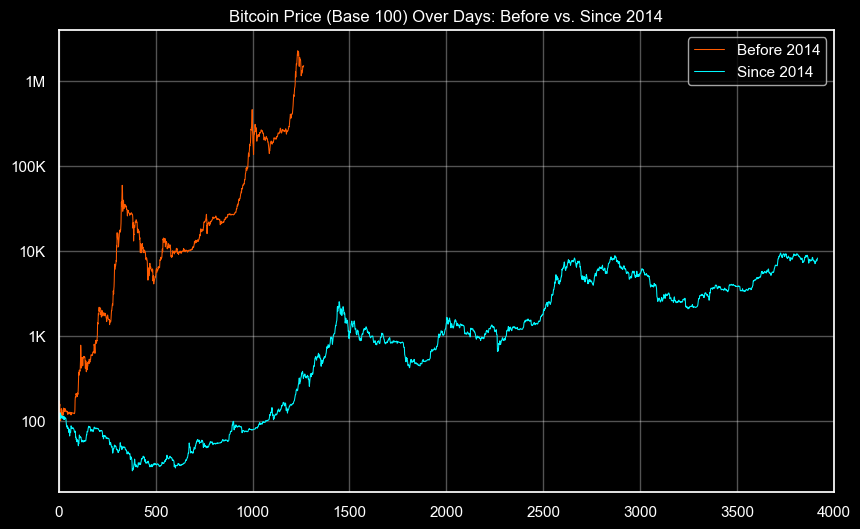

In [28]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_btc_b2014, x="day_number", y="base_100_price", color="#ff5b00", linewidth=0.75, label="Before 2014")
sns.lineplot(data=df_btc_s2014, x="day_number", y="base_100_price", color="#00f8ff", linewidth=0.75, label="Since 2014")

plt.yscale("log")
plt.xlim(0, 4000)

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: (
        f"{int(x)}" if x < 1000 and x.is_integer() 
        else f"{x:.1f}" if x < 1 
        else f"{int(x / 1000)}K" if x < 1_000_000 
        else f"{int(x / 1_000_000)}M"
    ))
)

plt.title("Bitcoin Price (Base 100) Over Days: Before vs. Since 2014")
plt.xlabel(None)
plt.ylabel(None)

plt.legend()

save_chart_as_png("2_BTC_price_2014")

In [29]:
# Create table with basic stats of both timeframes and the ratio
def calculate_stats(df: pd.DataFrame) -> dict[str, float]:
    return {
        "Number of days": df["price"].count(),
        "Final price (base 100)": round(df.iloc[-1]["base_100_price"], 4),
        "Cumulative returns": round((df["price_change"] + 1).prod() - 1, 4),
    }

df_tf_stats = pd.DataFrame({
    "Before 2014": calculate_stats(df_btc_b2014),
    "Since 2014": calculate_stats(df_btc_s2014),
})

df_tf_stats["Ratio (before / since)"] = (df_tf_stats["Before 2014"] / df_tf_stats["Since 2014"]).round(4)

# Format output to remove scientific notation and make more readable
df_tf_stats = df_tf_stats.map(lambda x: f"{float(x):,.2f}" if isinstance(x, (int, float)) else x)

df_tf_stats.T

,Number of days,Final price (base 100),Cumulative returns
Before 2014,"1,264.00","1,506,540.00","15,064.40"
Since 2014,"3,916.00","8,260.30",81.60
Ratio (before / since),0.32,182.38,184.61


**Key takeaways:**
- This chart clearly highlights the massive difference in returns between an early adopter and everyone else.
- A hundred dollar investment made in July 2010 would have grown to over \$1.5 million in less than two and a half years.
- If the same hundred had been invested at the start of 2014, it would have just grown to over \$8,200 after more than 10 years, which is still an impressive return.
- However, this same investment, since 2014, doesn't seem likely to surpass the $1 million mark in the next couple of decades.

### Distribution of Returns (Before vs. Since 2014)

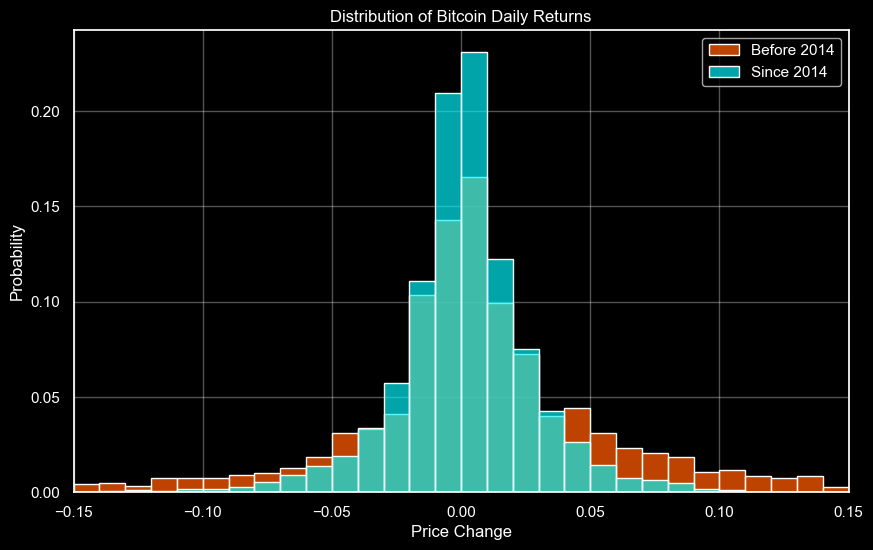

In [30]:
sym_limit = 0.15
df_btc_lim = df_btc.query(f"{-sym_limit} <= price_change_log <= {sym_limit}")

plt.figure(figsize=(10, 6))

sns.histplot(df_btc_lim[df_btc_lim.index.year < 2014]["price_change_log"], stat="probability", binwidth=0.01, binrange=(-sym_limit, sym_limit), color="#ff5b00", alpha=3/4, label="Before 2014")
sns.histplot(df_btc_lim[df_btc_lim.index.year >= 2014]["price_change_log"], stat="probability", binwidth=0.01, binrange=(-sym_limit, sym_limit), color="#00f8ff", alpha=2/3, label="Since 2014")

plt.xlim(-sym_limit, sym_limit)

plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Price Change")
plt.ylabel("Probability")
plt.legend()

save_chart_as_png("2_BTC_returns_dist_2014")

In [31]:
# Create table with stats of both timeframes and the ratio
def calculate_stats(df: pd.DataFrame) -> dict[str, float]:
    return {
        "Average return": round(df["price_change_log"].mean(), 4),
        "Median return": round(df["price_change_log"].median(), 4),
        "Standard deviation": round(df["price_change_log"].std(), 4),
        "Min return": round(df["price_change_log"].min(), 4),
        "Max return": round(df["price_change_log"].max(), 4),
        "Skewness": round(df["price_change_log"].skew(), 4),
        "Kurtosis": round(df["price_change_log"].kurt(), 4),
    }

df_tf_stats = pd.DataFrame({
    "Before 2014": calculate_stats(df_btc_b2014),
    "Since 2014": calculate_stats(df_btc_s2014),
})

df_tf_stats["Ratio (before / since)"] = (df_tf_stats["Before 2014"] / df_tf_stats["Since 2014"]).round(4)
df_tf_stats.T

,Average return,Median return,Standard deviation,Min return,Max return,Skewness,Kurtosis
Before 2014,0.0076,0.0031,0.0732,-0.4914,0.5400,-0.0867,10.5482
Since 2014,0.0011,0.0011,0.0273,-0.2242,0.2095,-0.4911,6.2692
Ratio (before / since),6.9091,2.8182,2.6813,2.1918,2.5776,0.1765,1.6825


**Key takeaways:**
- There is a noticeable difference in the price distributions across the different timeframes.
- Before 2014, bitcoin's average return was much higher compared to the post-2014 period, indicating greater profitability in earlier years. The median also dropped and became equal to the mean, suggesting that returns have become more symmetric, with fewer positive outliers.
- Since 2014, the standard deviation has dropped significantly, pointing to reduced price volatility in recent years.
- The range of returns has narrowed, with smaller extremes in both minimum and maximum values.
- Both periods show negative skewness, though it is more pronounced after 2014, suggesting a stronger tendency for more frequent returns below the mean in recent years.
- Kurtosis has decreased notably, meaning there are fewer extreme outliers since 2014, although the market still sees occasional sharp movements.

## Price vs. Returns 🌀

In [32]:
# Get 90-day moving average price
df_btc["price_90d_ma"] = df_btc["price"].rolling(window=90).mean()

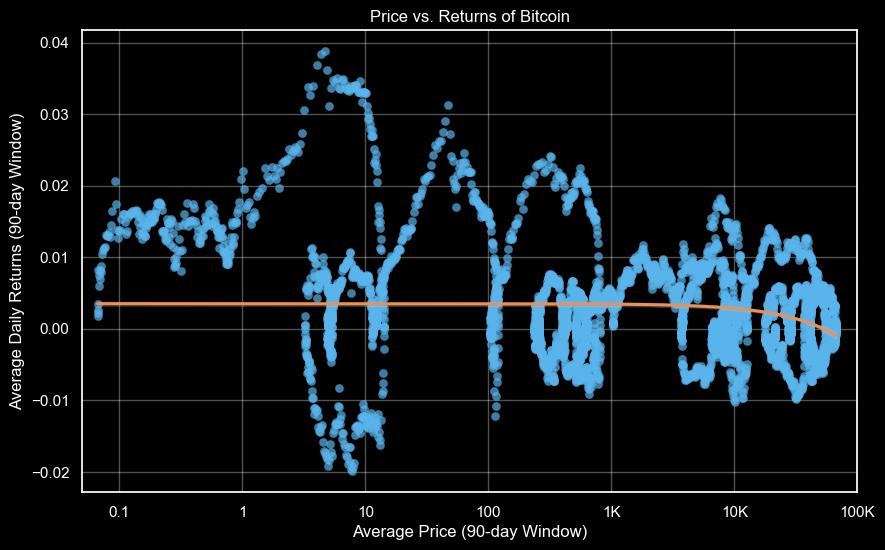

In [33]:
plt.figure(figsize=(10, 6))

sns.regplot(data=df_btc, x="price_90d_ma", y="price_change_log_90d_ma",
            scatter_kws={"alpha": 0.7, "linewidths": 0.2, "color": "#59b5ec"},
            line_kws={"color": "#ec8f59"})

plt.xscale("log")
plt.xlim(0.05, 100_000)

plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{int(x)}" if x < 1000 and x.is_integer()
                  else (f"{x:.1f}" if x < 1 else f"{int(x/1000)}K"))
)

plt.title("Price vs. Returns of Bitcoin")
plt.xlabel("Average Price (90-day Window)")
plt.ylabel("Average Daily Returns (90-day Window)")

save_chart_as_png("2_BTC_price_vs_returns")

In [34]:
# Pearson correlation coefficient betweent price and returns
df_btc["price_90d_ma"].corr(df_btc["price_change_log_90d_ma"]).round(2)

-0.16

**Key takeaways:**
- Before bitcoin's price reaches 1,000, the returns are more dispersed from zero but tend to skew positively.
- After crossing the 1,000 mark, returns become more stable, staying within the range of ±0.01.
- When comparing price (or market cap) with returns, there is a weak negative correlation of -0.16, much weaker than what was expected.